##**Experiment No. 10**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Build an Artificial Neural Network algorithm and test the same using appropriate data set**

##**Theory**

The term "Artificial Neural Network" is derived from Biological neural networks that develop the structure of a human brain. Similar to the human brain that has neurons interconnected to one another, artificial neural networks also have neurons that are interconnected to one another in various layers of the networks. These neurons are known as nodes.



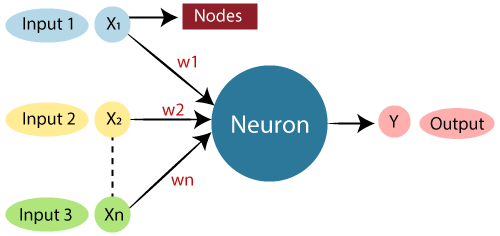

**The architecture of an artificial neural network**

Artificial Neural Network primarily consists of three layers:

**Input Layer:**

As the name suggests, it accepts inputs in several different formats provided by the programmer.

**Hidden Layer:**

The hidden layer presents in-between input and output layers. It performs all the calculations to find hidden features and patterns.

**Output Layer:**

The input goes through a series of transformations using the hidden layer, which finally results in output that is conveyed using this layer.

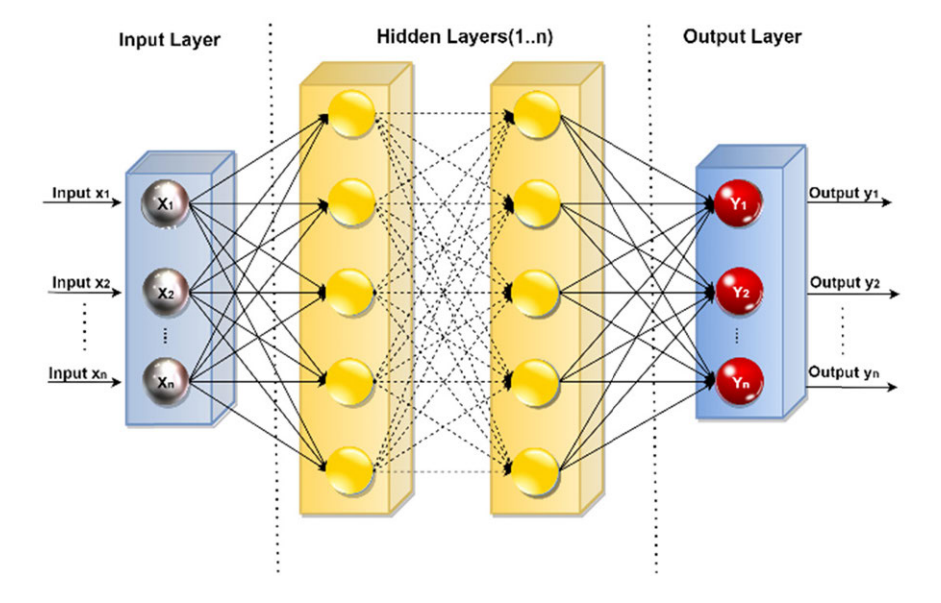

The artificial neural network takes input and computes the weighted sum of the inputs and includes a bias. This computation is represented in the form of a transfer function.

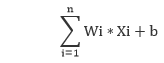

It determines weighted total is passed as an input to an activation function to produce the output. Activation functions choose whether a node should fire or not. Only those who are fired make it to the output layer. There are distinctive activation functions available that can be applied upon the sort of task we are performing.

**Importing necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

**Loading Dataset**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/AIR_LAB_DATASETS/Churn_Modelling - Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**Drop categorical variables**

In [ ]:
data.drop(columns=['Surname', 'Geography','Gender'], inplace=True)

In [ ]:
data

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1


**Create inpute and output features(Exited)  as X and Y**

In [ ]:
X=data.drop('Exited',axis=1)
X

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,42,2,0.00,1,1,1,101348.88
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57
3,4,15701354,699,39,1,0.00,2,0,0,93826.63
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52


In [ ]:
Y=data['Exited']

**Splitting dataset into training and testing dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

**Performing Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Import required libraries for ANN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

**Initialising ANN**

In [ ]:
model = Sequential()

**Adding First Hidden Layer**

This class accepts 2 inputs:-
1. units:- number of neurons that will be present in the respective layer
2. activation:- specify which activation function to be used

In [ ]:
model.add(Dense(units=6,activation="relu"))

**Adding Second Hidden Layer**

In [ ]:
model.add(Dense(units=6,activation="relu"))

**Adding Output Layer**

In [ ]:
model.add(Dense(units=1,activation="sigmoid"))

1. In a binary classification problem(like this one) we will be having only two classes as output (1 and 0), we will be allocating only one neuron to output this result. For the multiclass classification problem, we have to use more than one neuron in the output layer. For example – if our output contains 4 categories then we need to create 4 different neurons[one for each category].

2. For the binary classification Problems, the activation function that should always be used is sigmoid. For a multiclass classification problem, the activation function that should be used is softmax.

**Compiling ANN**

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

Compile method accepts the below inputs:-

1. optimizer:- specifies which optimizer to be used in order to perform stochastic gradient descent. (Various optimizers like RMSProp, adam etc).

2. loss:- specifies which loss function should be used. For binary classification, the value should be binary_crossentropy. For multiclass classification, it should be categorical_crossentropy.

3. metrics:- which performance metrics to be used in order to compute performance. Here we have used accuracy as a performance metric.

**Fitting ANN**

In [ ]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=8, validation_data=(X_test, Y_test), verbose=2)

Epoch 1/50
1000/1000 - 3s - loss: 0.5260 - accuracy: 0.7613 - val_loss: 0.4448 - val_accuracy: 0.8070 - 3s/epoch - 3ms/step
Epoch 2/50
1000/1000 - 2s - loss: 0.4291 - accuracy: 0.8139 - val_loss: 0.4071 - val_accuracy: 0.8230 - 2s/epoch - 2ms/step
Epoch 3/50
1000/1000 - 3s - loss: 0.4054 - accuracy: 0.8334 - val_loss: 0.3813 - val_accuracy: 0.8475 - 3s/epoch - 3ms/step
Epoch 4/50
1000/1000 - 3s - loss: 0.3847 - accuracy: 0.8468 - val_loss: 0.3690 - val_accuracy: 0.8505 - 3s/epoch - 3ms/step
Epoch 5/50
1000/1000 - 4s - loss: 0.3727 - accuracy: 0.8466 - val_loss: 0.3579 - val_accuracy: 0.8580 - 4s/epoch - 4ms/step
Epoch 6/50
1000/1000 - 4s - loss: 0.3671 - accuracy: 0.8526 - val_loss: 0.3544 - val_accuracy: 0.8610 - 4s/epoch - 4ms/step
Epoch 7/50
1000/1000 - 5s - loss: 0.3642 - accuracy: 0.8520 - val_loss: 0.3541 - val_accuracy: 0.8610 - 5s/epoch - 5ms/step
Epoch 8/50
1000/1000 - 2s - loss: 0.3630 - accuracy: 0.8540 - val_loss: 0.3502 - val_accuracy: 0.8635 - 2s/epoch - 2ms/step
Epoch 9/

1.X_train:- Matrix of features for the training dataset

2.Y_train:- Dependent variable vectors for the training dataset

3.batch_size: how many observations should be there in the batch. Usually, the value for this parameter is 32 but we can experiment with any other value as well.
4.epochs: How many times neural networks will be trained. .

**Plot training vs val_accuracy graph**

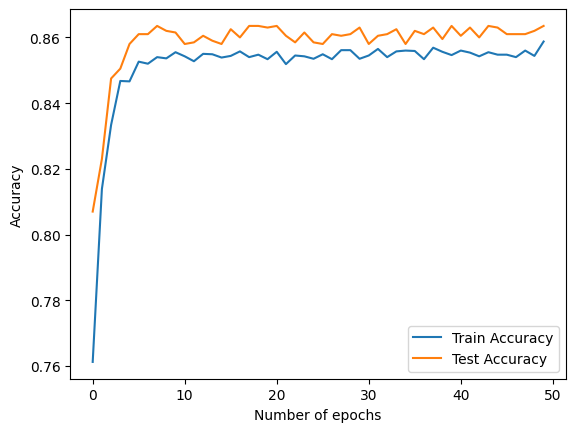

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Plot training loss vs validation loss graph**

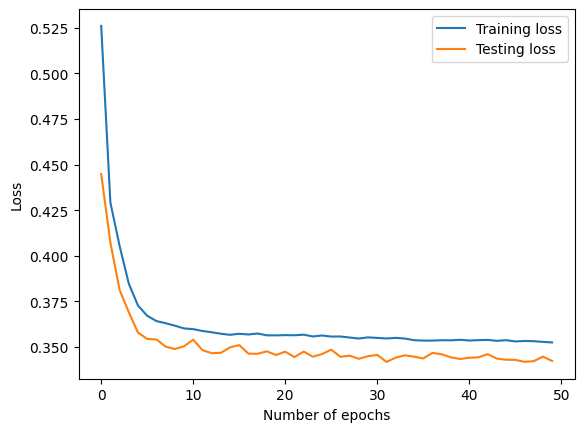

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Testing loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Perform prediction by difining threshold value as 0.5**

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


y_pred > 0.5 means if y-pred is in between 0 to 0.5, then this new y_pred will become 0(False). And if y_pred is larger than 0.5, then the new y_pred will become 1(True).

**Generate confusion matrix and classification report**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

[[1523   72]
 [ 201  204]]


0.8635